# Importing Packages

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img

# Image Augmentation

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [4]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
x_train = train_datagen.flow_from_directory(r'E:\AnimalRecognition\Dataset\Training',target_size=(64,64),
                                           class_mode='categorical',batch_size=100)

Found 1238 images belonging to 4 classes.


In [6]:
x_test = test_datagen.flow_from_directory(r'E:\AnimalRecognition\Dataset\Testing',target_size=(64,64),
                                           class_mode='categorical',batch_size=100)

Found 326 images belonging to 4 classes.


In [7]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# Model Building

In [8]:
model = Sequential()

In [9]:
#Convolution layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [10]:
#Max Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
#Flattening
model.add(Flatten())

In [12]:
#Fully connected layer
#Hidden layer1
model.add(Dense(300,activation='relu'))
#Hidden Layer2
model.add(Dense(150,activation='relu'))

In [13]:
#output layer
model.add(Dense(4,activation='softmax'))

# Compiling

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model fitting

In [16]:
model.fit(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
13/13 [==============================] - 12s 654ms/step - loss: 3.0824 - accuracy: 0.3110 - val_loss: 1.6577 - val_accuracy: 0.3865
Epoch 2/10
13/13 [==============================] - 7s 518ms/step - loss: 1.3922 - accuracy: 0.3473 - val_loss: 1.2746 - val_accuracy: 0.4294
Epoch 3/10
13/13 [==============================] - 7s 525ms/step - loss: 1.2565 - accuracy: 0.4443 - val_loss: 1.2200 - val_accuracy: 0.3742
Epoch 4/10
13/13 [==============================] - 7s 523ms/step - loss: 1.1044 - accuracy: 0.5646 - val_loss: 0.9513 - val_accuracy: 0.6104
Epoch 5/10
13/13 [==============================] - 7s 511ms/step - loss: 0.9581 - accuracy: 0.6195 - val_loss: 0.7772 - val_accuracy: 0.7055
Epoch 6/10
13/13 [==============================] - 7s 512ms/step - loss: 0.8220 - accuracy: 0.6842 - val_loss: 0.6908 - val_accuracy: 0.7546
Epoch 7/10
13/13 [==============================] - 7s 548ms/step - loss: 0.7349 - accuracy: 0.7197 - val_loss: 0.7432 - val_accuracy: 0.7147
Epoch

In [17]:
model.save('animalRecognition.h5')

# Testing

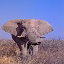

In [20]:
model = load_model('animal.h5')
img = load_img(r'E:\AnimalRecognition\Dataset\Training\elephants\9k_ (5).jpeg',target_size=(64,64))
img

In [23]:
from tensorflow.keras.preprocessing.image import img_to_array

In [24]:
x=img_to_array(img)

In [25]:
x=np.expand_dims(x,axis=0)

In [26]:
# prediction
pred = np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 2s 2s/step


In [27]:
pred

array([2], dtype=int64)

In [28]:
index=["bears","crows","elephants","rats"]

In [29]:
print(index[pred[0]])

elephants
